<b>Import of required libraries</b>

In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import binom, wilcoxon, ranksums
from statsmodels.stats.descriptivestats import sign_test

<b>1. Sign test example (binomial distribution values based on 19th slide from [here](http://home.agh.edu.pl/~kca/stat/WYK%A3ADY_pdf/WYK%A3AD%208.pdf) and [here](https://www.statisticshowto.datasciencecentral.com/sign-test/))</b>

=== First sample stats ===
Sample min: 		 57 
Sample max: 		 94 
Sample 1st quartile: 	 63.0 
Sample median: 		 83.5 
Sample 3rd quartile: 	 88.75 
Sample mean: 		 77.05 
Sample variance: 	 186.1475 
Sample std dev: 	 13.643588237703453

=== Second sample stats ===
Sample min: 		 53 
Sample max: 		 91 
Sample 1st quartile: 	 62.75 
Sample median: 		 74.0 
Sample 3rd quartile: 	 84.0 
Sample mean: 		 73.1 
Sample variance: 	 148.58999999999997 
Sample std dev: 	 12.189749792346026

First sample median: 	 83.5 
Second sample median: 	 74.0

Positive signs: 	 14 
Negative signs: 	 4
Non-zero signs: 	 18 
r (fewer signs): 	 4 
r_alpha (dist value): 	 4

Result: 		 r value (fewer signs number) is less/equal than r_alpha
			 (value from distribution) - we reject the null hypothesis

p-value: 		 0.00932678397558449 
alpha: 			 0.05
Result: 		 p-value is smaller than or equal to alpha 
 			 We reject null hypothesis


Text(0, 0.5, 'Patient weight')

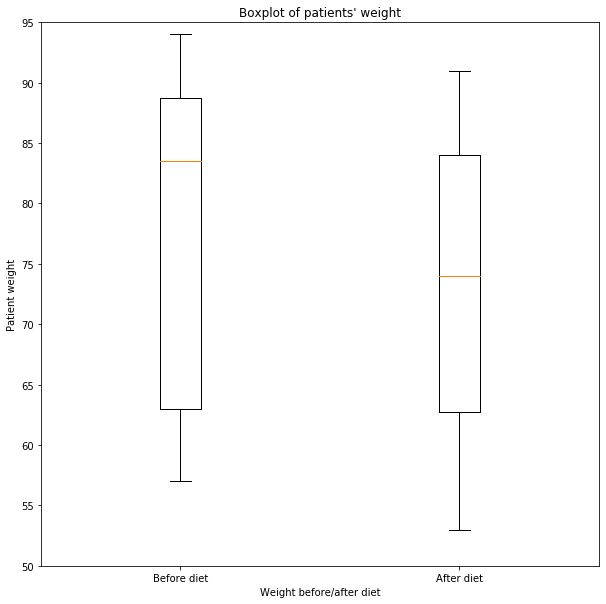

In [21]:
def summarize_sample(sample):
    print('Sample min: \t\t {0}'.format(np.min(sample)), 
          '\nSample max: \t\t {0}'.format(np.max(sample)),
          '\nSample 1st quartile: \t {0}'.format(np.percentile(sample, 25)), 
          '\nSample median: \t\t {0}'.format(np.median(sample)), 
          '\nSample 3rd quartile: \t {0}'.format(np.percentile(sample, 75)),
          '\nSample mean: \t\t {0}'.format(np.mean(sample)), 
          '\nSample variance: \t {0}'.format(np.var(sample)), 
          '\nSample std dev: \t {0}'.format(np.std(sample)))
    
def get_binomial_distribution_value(n, k=0.9800):
    if n > 90:
        dist_value = np.floor(0.5 * (n - 1) - (k * np.square(n + 1)))
    else:
        values_dict = {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, 
                       '8': 0, '9': 1, '10': 1, '11': 1, '12': 2, '13': 2,
                       '14': 2, '15': 3, '16': 3, '17': 4, '18': 4, '19': 4,
                       '20': 5, '21': 5, '22': 5, '23': 6, '24': 6, '25': 7,
                       '26': 7, '27': 7, '28': 8, '29': 8, '30': 9, '31': 9,
                       '32': 9, '33': 10, '34': 10, '35': 11, '36': 11,
                       '37': 12, '38': 12, '39': 12, '40': 13, '41': 13,
                       '42': 14, '43': 14, '44': 15, '45': 15, '46': 15,
                       '47': 16, '48': 16, '49': 17, '50': 17, '51': 18,
                       '52': 18, '53': 18, '54': 19, '55': 19, '56': 20,
                       '57': 20, '58': 21, '59': 21, '60': 21, '61': 22, 
                       '62': 22, '63': 23, '64': 23, '65': 24, '66': 24, 
                       '67': 25, '68': 25, '69': 25, '70': 26, '71': 26, 
                       '72': 27, '73': 27, '74': 28, '75': 28, '76': 28, 
                       '77': 29, '78': 29, '79': 30, '80': 30, '81': 31, 
                       '82': 31, '83': 32, '84': 32, '85': 32, '86': 33, 
                       '87': 33, '88': 34, '89': 34, '90': 35}
        dist_value = values_dict[str(n)]
    return dist_value

def count_fewer_signs(sample1, sample2):
    # get differences list
    differences_list = np.asarray(sample1, dtype=np.int) - np.asarray(sample2, dtype=np.int)

    # count positive differences
    positive_signs = sum(difference > 0 for difference in differences_list)
    
    # count negative differences
    negative_signs = sum(difference < 0 for difference in differences_list)
    
    # print number of positive signs and negative signs
    print('\nPositive signs: \t {0}'.format(positive_signs), 
          '\nNegative signs: \t {0}'.format(negative_signs))
    
    # return number of fewer signs and number of non-zero signs
    return min(positive_signs, negative_signs), positive_signs + negative_signs

def signs_test(sample1, sample2):
    r, non_zero_signs = count_fewer_signs(sample1, sample2)
    
    number_of_observations = non_zero_signs
    dist_value = get_binomial_distribution_value(number_of_observations)
    
    print('Non-zero signs: \t {0}'.format(non_zero_signs),
          '\nr (fewer signs): \t {0}'.format(r), 
          '\nr_alpha (dist value): \t {0}'.format(dist_value))
    
    if r <= dist_value:
        print('\nResult: \t\t r value (fewer signs number) is less/equal than r_alpha\n\t\t\t (value from distribution) - we reject the null hypothesis')
    else:
        print('\nResult: \t\t r value (fewer signs number) is greater than r_alpha\n\t\t\t (value from distribution) - we can\'t reject the null hypothesis')

    p = binom.pmf(r, non_zero_signs, 0.05)
    alpha = 0.05
    
    print('\np-value: \t\t {0}'.format(p), '\nalpha: \t\t\t {0}'.format(alpha))
    
    if p <= alpha:
        print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
    else:
        print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')

w1 = [88, 69, 86, 59, 57, 82, 94, 93, 64, 91, 86, 59, 91, 60, 57, 92, 70, 88, 70, 85]
w2 = [73, 68, 75, 54, 53, 84, 84, 86, 66, 84, 78, 58, 91, 57, 59, 88, 71, 84, 64, 85]

print('=== First sample stats ===')
summarize_sample(w1)

print('\n=== Second sample stats ===')
summarize_sample(w2)

print('\nFirst sample median: \t {0}'.format(np.median(w1)),
     '\nSecond sample median: \t {0}'.format(np.median(w2)))

signs_test(w1, w2)

# boxplot
plt.figure(figsize=(10,10))
plt.boxplot((w1, w2), labels=['Before diet', 'After diet'])
plt.ylim(50, 95)
plt.title('Boxplot of patients\' weight')
plt.xlabel('Weight before/after diet')
plt.ylabel('Patient weight')

Text(0, 0.5, 'Number of patients')

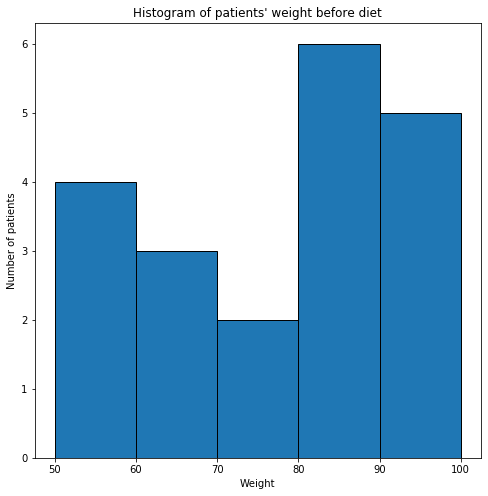

In [10]:
# histogram of the first sample
plt.hist(w1, bins=[50, 60, 70, 80, 90, 100], ec='black')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8
plt.title('Histogram of patients\' weight before diet')
plt.xlabel('Weight')
plt.ylabel('Number of patients')

Text(0, 0.5, 'Number of patients')

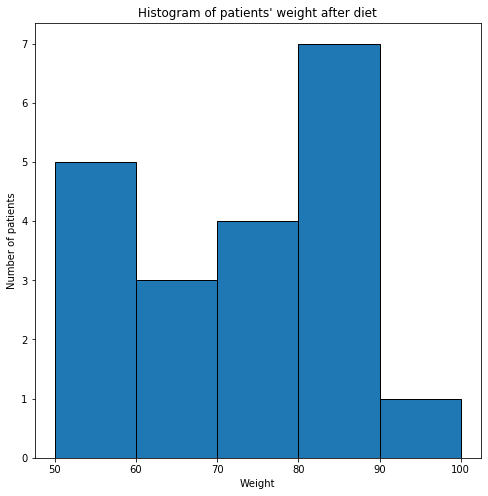

In [11]:
# histogram of the second sample
plt.hist(w2, bins=[50, 60, 70, 80, 90, 100], ec='black')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8
plt.title('Histogram of patients\' weight after diet')
plt.xlabel('Weight')
plt.ylabel('Number of patients')

<b>2. Sign test example for book reading samples (binomial distribution values based on 19th slide from [here](http://home.agh.edu.pl/~kca/stat/WYK%A3ADY_pdf/WYK%A3AD%208.pdf) and [here](https://www.statisticshowto.datasciencecentral.com/sign-test/))</b>

=== First sample stats ===
Sample min: 		 10 
Sample max: 		 47 
Sample 1st quartile: 	 13.75 
Sample median: 		 17.0 
Sample 3rd quartile: 	 24.0 
Sample mean: 		 19.05 
Sample variance: 	 59.09750000000001 
Sample std dev: 	 7.687489837391658

=== Second sample stats ===
Sample min: 		 8 
Sample max: 		 42 
Sample 1st quartile: 	 13.0 
Sample median: 		 17.0 
Sample 3rd quartile: 	 21.0 
Sample mean: 		 18.15 
Sample variance: 	 58.62750000000001 
Sample std dev: 	 7.6568596696034605

First sample median: 	 17.0 
Second sample median: 	 17.0

Positive signs: 	 31 
Negative signs: 	 7
Non-zero signs: 	 38 
r (fewer signs): 	 7 
r_alpha (dist value): 	 12

Result: 		 r value (fewer signs number) is less/equal than r_alpha
			 (value from distribution) - we reject the null hypothesis

p-value: 		 0.002010434641452555 
alpha: 			 0.05
Result: 		 p-value is smaller than or equal to alpha 
 			 We reject null hypothesis


Text(0, 0.5, 'Number of books read')

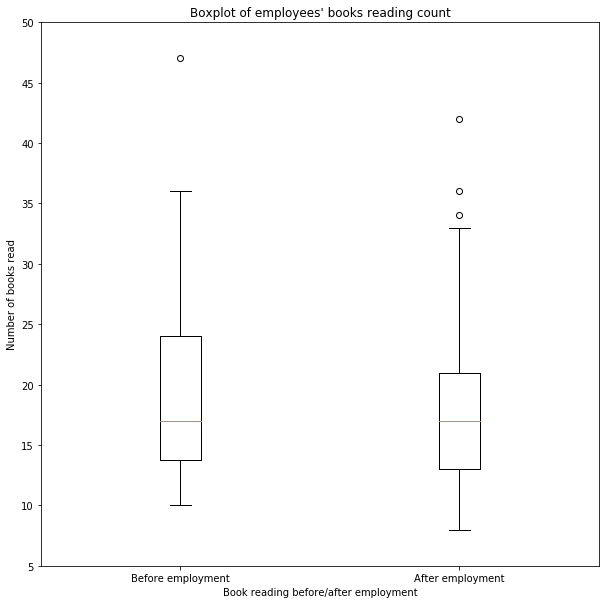

In [22]:
def summarize_sample(sample):
    print('Sample min: \t\t {0}'.format(np.min(sample)), 
          '\nSample max: \t\t {0}'.format(np.max(sample)),
          '\nSample 1st quartile: \t {0}'.format(np.percentile(sample, 25)), 
          '\nSample median: \t\t {0}'.format(np.median(sample)), 
          '\nSample 3rd quartile: \t {0}'.format(np.percentile(sample, 75)),
          '\nSample mean: \t\t {0}'.format(np.mean(sample)), 
          '\nSample variance: \t {0}'.format(np.var(sample)), 
          '\nSample std dev: \t {0}'.format(np.std(sample)))
    
def get_binomial_distribution_value(n, k=0.9800):
    if n > 90:
        dist_value = np.floor(0.5 * (n - 1) - (k * np.square(n + 1)))
    else:
        values_dict = {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, 
                       '8': 0, '9': 1, '10': 1, '11': 1, '12': 2, '13': 2,
                       '14': 2, '15': 3, '16': 3, '17': 4, '18': 4, '19': 4,
                       '20': 5, '21': 5, '22': 5, '23': 6, '24': 6, '25': 7,
                       '26': 7, '27': 7, '28': 8, '29': 8, '30': 9, '31': 9,
                       '32': 9, '33': 10, '34': 10, '35': 11, '36': 11,
                       '37': 12, '38': 12, '39': 12, '40': 13, '41': 13,
                       '42': 14, '43': 14, '44': 15, '45': 15, '46': 15,
                       '47': 16, '48': 16, '49': 17, '50': 17, '51': 18,
                       '52': 18, '53': 18, '54': 19, '55': 19, '56': 20,
                       '57': 20, '58': 21, '59': 21, '60': 21, '61': 22, 
                       '62': 22, '63': 23, '64': 23, '65': 24, '66': 24, 
                       '67': 25, '68': 25, '69': 25, '70': 26, '71': 26, 
                       '72': 27, '73': 27, '74': 28, '75': 28, '76': 28, 
                       '77': 29, '78': 29, '79': 30, '80': 30, '81': 31, 
                       '82': 31, '83': 32, '84': 32, '85': 32, '86': 33, 
                       '87': 33, '88': 34, '89': 34, '90': 35}
        dist_value = values_dict[str(n)]
    return dist_value

def count_fewer_signs(sample1, sample2):
    # get differences list
    differences_list = np.asarray(sample1, dtype=np.int) - np.asarray(sample2, dtype=np.int)

    # count positive differences
    positive_signs = sum(difference > 0 for difference in differences_list)
    
    # count negative differences
    negative_signs = sum(difference < 0 for difference in differences_list)
    
    # print number of positive signs and negative signs
    print('\nPositive signs: \t {0}'.format(positive_signs), 
          '\nNegative signs: \t {0}'.format(negative_signs))
    
    # return number of fewer signs and number of non-zero signs
    return min(positive_signs, negative_signs), positive_signs + negative_signs

def signs_test(sample1, sample2):
    r, non_zero_signs = count_fewer_signs(sample1, sample2)
    
    number_of_observations = non_zero_signs
    dist_value = get_binomial_distribution_value(number_of_observations)
    
    print('Non-zero signs: \t {0}'.format(non_zero_signs),
          '\nr (fewer signs): \t {0}'.format(r), 
          '\nr_alpha (dist value): \t {0}'.format(dist_value))
    
    if r <= dist_value:
        print('\nResult: \t\t r value (fewer signs number) is less/equal than r_alpha\n\t\t\t (value from distribution) - we reject the null hypothesis')
    else:
        print('\nResult: \t\t r value (fewer signs number) is greater than r_alpha\n\t\t\t (value from distribution) - we can\'t reject the null hypothesis')

    p = binom.pmf(r, non_zero_signs, 0.05)
    alpha = 0.05
    
    print('\np-value: \t\t {0}'.format(p), '\nalpha: \t\t\t {0}'.format(alpha))
    
    if p <= alpha:
        print('Result: \t\t p-value is smaller than or equal to alpha \n \t\t\t We reject null hypothesis')
    else:
        print('Result: \t\t p-value is greater than alpha \n \t\t\t We can\'t reject null hypothesis')

df = pd.read_csv(os.path.join('dane_listy_3_-_5', 'czytelnictwo.csv'))

print('=== First sample stats ===')
summarize_sample(df['przed'])

print('\n=== Second sample stats ===')
summarize_sample(df['po'])

summarize_sample

print('\nFirst sample median: \t {0}'.format(np.median(df['przed'])), 
      '\nSecond sample median: \t {0}'.format(np.median(df['po'])))

signs_test(df['przed'], df['po'])

# boxplot
plt.figure(figsize=(10,10))
plt.boxplot((df['przed'], df['po']), labels=['Before employment', 'After employment'])
plt.ylim(5, 50)
plt.title('Boxplot of employees\' books reading count')
plt.xlabel('Book reading before/after employment')
plt.ylabel('Number of books read')

Text(0, 0.5, 'Number of employees')

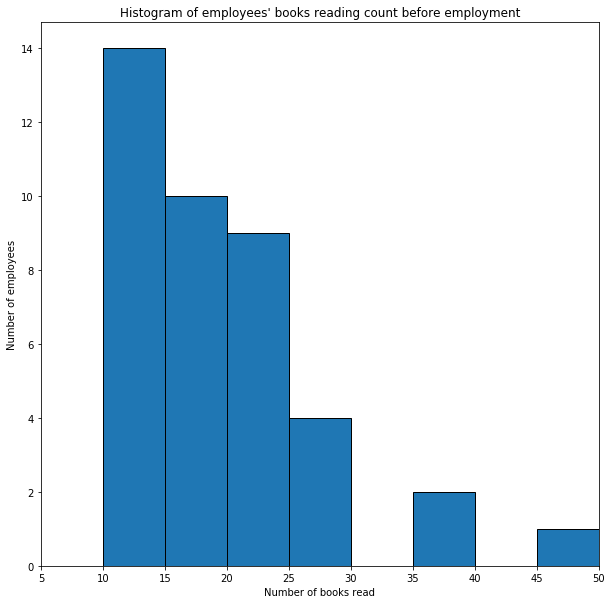

In [13]:
# histogram of the first sample
plt.figure(figsize=(10,10))
plt.hist(df['przed'], bins=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50], ec='black')
plt.xlim(5, 50)
plt.title('Histogram of employees\' books reading count before employment')
plt.xlabel('Number of books read')
plt.ylabel('Number of employees')

Text(0, 0.5, 'Number of employees')

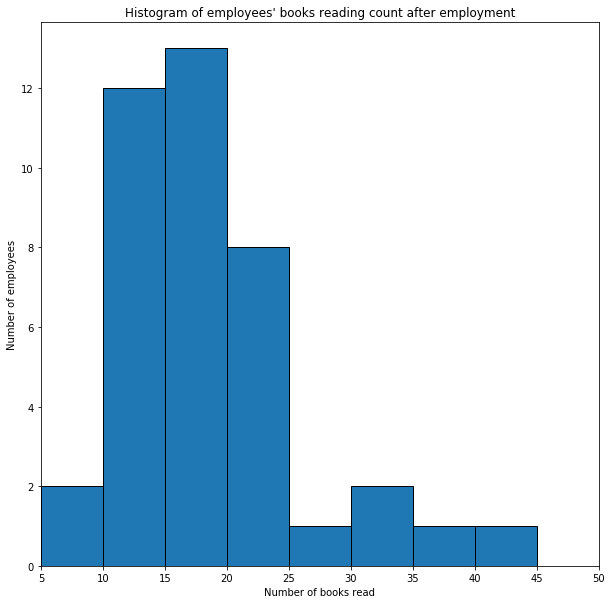

In [14]:
# histogram of the second sample
plt.figure(figsize=(10,10))
plt.hist(df['po'], bins=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50], ec='black')
plt.xlim(5, 50)
plt.title('Histogram of employees\' books reading count after employment')
plt.xlabel('Number of books read')
plt.ylabel('Number of employees')

<b>3. Wilcoxon rank-sum test example</b>

In [15]:
df = pd.read_csv(os.path.join('dane_listy_3_-_5', 'chmiel.csv'))

print('First sample median: \t {0}'.format(np.median(df['zapylona'])),
     '\nSecond sample median: \t {0}'.format(np.median(df['niezapyl'])))

stat, p = ranksums(df['zapylona'], df['niezapyl'])

alpha = 0.05

print('\np-value: \t\t {0}'.format(p),
     '\nalpha: \t\t\t {0}'.format(alpha))

if p <= alpha:
    print('\nResult: \t\t p-value is less/equal than alpha - we reject the null hypothesis')
else:
    print('\nResult: \t\t p-value is greater than alpha - we can\'t reject the null hypothesis')

First sample median: 	 0.73 
Second sample median: 	 0.18

p-value: 		 0.001745118699528905 
alpha: 			 0.05

Result: 		 p-value is less/equal than alpha - we reject the null hypothesis


<b>4. Wilcoxon rank-sum test example for employees' press reading time</b>

In [16]:
df = pd.read_csv(os.path.join('dane_listy_3_-_5', 'czytelnictwo.csv'))

print('First sample median: \t {0}'.format(np.median(df['przed'])),
     '\nSecond sample median: \t {0}'.format(np.median(df['po'])))

stat, p = ranksums(df['przed'], df['po'])

alpha = 0.05

print('\np-value: \t\t {0}'.format(p),
     '\nalpha: \t\t\t {0}'.format(alpha))

if p <= alpha:
    print('\nResult: \t\t p-value is less/equal than alpha - we reject the null hypothesis')
else:
    print('\nResult: \t\t p-value is greater than alpha - we can\'t reject the null hypothesis')

First sample median: 	 17.0 
Second sample median: 	 17.0

p-value: 		 0.46458961554772527 
alpha: 			 0.05

Result: 		 p-value is greater than alpha - we can't reject the null hypothesis


<b>5. Wilcoxon rank-sum test example for custom alpha (0.9)</b>

In [17]:
df = pd.read_csv(os.path.join('dane_listy_3_-_5', 'dane z koronografii.csv'))

print('First sample median: \t {0}'.format(np.median(df[df['group'] == 1]['time'])),
     '\nSecond sample median: \t {0}'.format(np.median(df[df['group'] == 2]['time'])))

stat, p = ranksums(df[df['group'] == 1]['time'], df[df['group'] == 2]['time'])

alpha = 0.9

print('\np-value: \t\t {0}'.format(p),
     '\nalpha: \t\t\t {0}'.format(alpha))

if p <= alpha:
    print('\nResult: \t\t p-value is less/equal than alpha - we reject the null hypothesis')
else:
    print('\nResult: \t\t p-value is greater than alpha - we can\'t reject the null hypothesis')

First sample median: 	 984.0 
Second sample median: 	 729.0

p-value: 		 0.02633008765302607 
alpha: 			 0.9

Result: 		 p-value is less/equal than alpha - we reject the null hypothesis
